Step 1: Data Collection

In [1]:
!pip  install numpy pandas tensorflow keras pillow matplotlib scikit-learn  seaborn scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2799418 sha256=aebdea03e4c230ca38c764254cca270f61369ae3d3c33cf1b50ca5c6651090d4
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import train_test_split

# Load the dataset files
ratings = pd.read_csv('/kaggle/input/movielens-20m-dataset/rating.csv')  # userId, movieId, rating, timestamp
movies = pd.read_csv('/kaggle/input/movielens-20m-dataset/movie.csv')    # movieId, title, genres

# Optional: Load tags if needed for content-based filtering in future steps
tags = pd.read_csv('/kaggle/input/movielens-20m-dataset/tag.csv')

# Display the first few rows of each dataset
print("Ratings Data:")
print(ratings.head())
print("\nMovies Data:")
print(movies.head())

# Merge ratings and movies on movieId to get movie titles alongside ratings
data = pd.merge(ratings, movies, on='movieId')

# Display the merged dataset
print("\nMerged Data:")
print(data.head())


Ratings Data:
   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40

Movies Data:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Merged Data:
   userId  movieId  rating            timestamp  \
0       1        2     3

Step 2: Data Cleaning

In [4]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# No missing values in this case, but if there were:
# data.dropna(inplace=True)

# Converting any necessary columns to correct data types
data['rating'] = data['rating'].astype(float)



Missing values in each column:
userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64


Step 3: Exploratory Data Analysis (EDA)

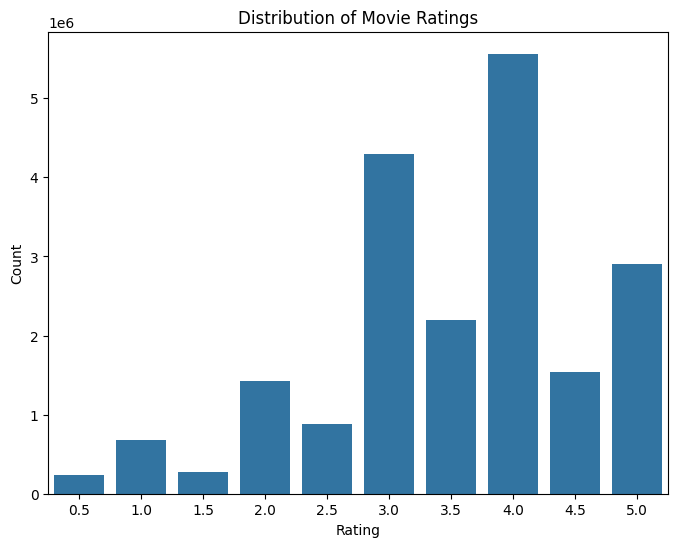


Top 10 most rated movies:
title
Pulp Fiction (1994)                          67310
Forrest Gump (1994)                          66172
Shawshank Redemption, The (1994)             63366
Silence of the Lambs, The (1991)             63299
Jurassic Park (1993)                         59715
Star Wars: Episode IV - A New Hope (1977)    54502
Braveheart (1995)                            53769
Terminator 2: Judgment Day (1991)            52244
Matrix, The (1999)                           51334
Schindler's List (1993)                      50054
dtype: int64


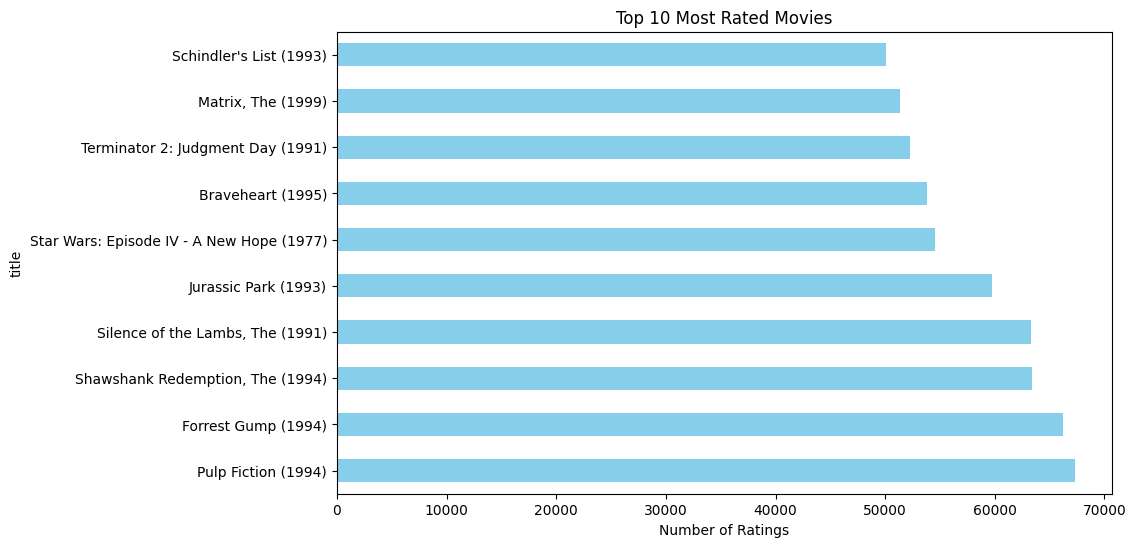


Top 10 movies with highest average ratings:
title
Pretty Things (2001)                                      5.0
Hollywood and The Pentagon: A Dangerous Liaison (2003)    5.0
Latin Music USA (2009)                                    5.0
Freeheld (2007)                                           5.0
The Old Gun (1975)                                        5.0
The Sea That Thinks (2000)                                5.0
Oranges (2004)                                            5.0
Abendland (2011)                                          5.0
Foster Brothers, The (Süt kardesler) (1976)               5.0
Only Daughter (2013)                                      5.0
Name: rating, dtype: float64


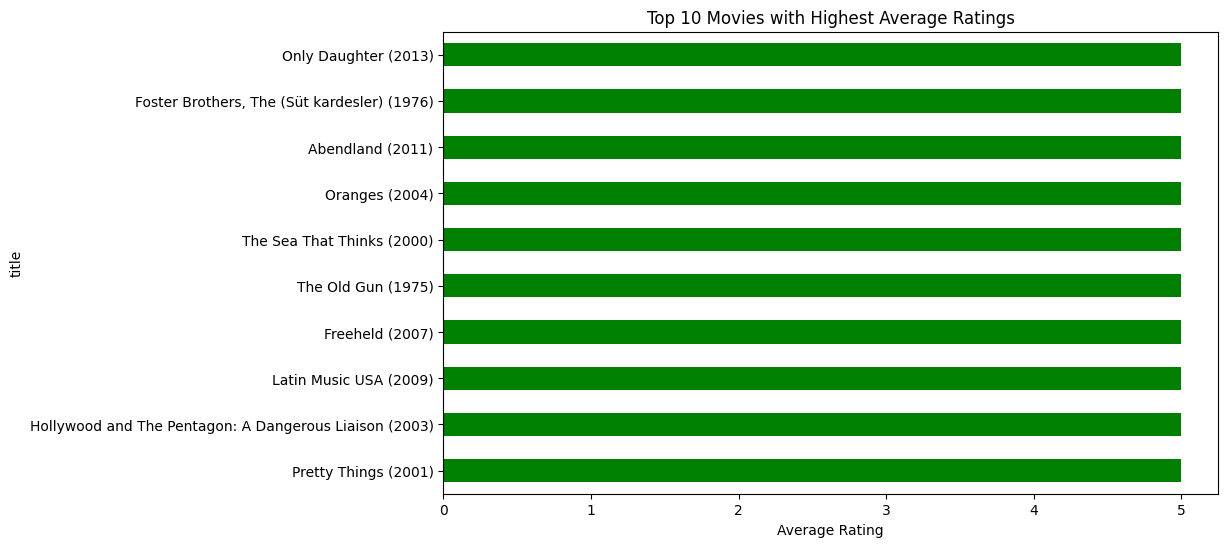

In [5]:
# EDA: Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=data)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# EDA: Most rated movies
top_rated_movies = data.groupby('title').size().sort_values(ascending=False).head(10)
print("\nTop 10 most rated movies:")
print(top_rated_movies)

# Plot top rated movies
top_rated_movies.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.show()

# EDA: Average ratings for the top 10 most rated movies
average_ratings = data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 movies with highest average ratings:")
print(average_ratings)

# Plot average ratings
average_ratings.plot(kind='barh', figsize=(10, 6), color='green')
plt.title('Top 10 Movies with Highest Average Ratings')
plt.xlabel('Average Rating')
plt.show()


Step 4: Data Preprocessing for Model Building

In [7]:
# Prepare the data for the surprise library (only userId, movieId, rating are needed)
reader = Reader(rating_scale=(0.5, 5))  # Assuming ratings range from 0.5 to 5
data_surprise = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

# Split the dataset into training and testing sets
trainset, testset = train_test_split(data_surprise, test_size=0.25)


Step 5: Model Selection and Training

In [ ]:
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate
# Hyperparameter tuning for KNNBasic using GridSearchCV
param_grid = {
    'k': [20, 40, 60],
    'sim_options': {
        'name': ['cosine', 'pearson'],
        'user_based': [False]  # Item-based collaborative filtering
    }
}

# Perform grid search to find the best parameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data_surprise)

# Best RMSE score
print(f"Best RMSE score: {gs.best_score['rmse']}")

# Best parameters
print(f"Best parameters: {gs.best_params['rmse']}")

# Use the best found algorithm with optimal parameters
algo = gs.best_estimator['rmse']

# Split the dataset into training and testing sets using stratified sampling for balanced rating distribution
trainset, testset = train_test_split(data_surprise, test_size=0.25)

# Train the model on the training set
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


KeyboardInterrupt: 

Step 6: Evaluation

In [ ]:
# Make predictions on the test set
predictions = algo.test(testset)

# Evaluate the model using RMSE (Root Mean Squared Error)
rmse = accuracy.rmse(predictions)
# Evaluate using MAE (Mean Absolute Error)
mae = accuracy.mae(predictions)

print(f"\nModel RMSE: {rmse}")
print(f"Model MAE: {mae}")

# Cross-Validation using K-Fold (optional for better performance estimates)
from surprise.model_selection import cross_validate
cross_validate(algo, data_surprise, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Step 7: Making Recommendations

In [ ]:
# Predict the rating for a specific user and movie
user_id = 1  # Example userId
movie_id = 1  # Example movieId

pred = algo.predict(uid=user_id, iid=movie_id)
print(f"\nPredicted rating for user {user_id} on movie {movie_id}: {pred.est}")

# Example: Recommend top 5 movies for a specific user
user_rated_movies = ratings[ratings['userId'] == user_id]['movieId'].values

# Recommend movies that the user hasn't rated yet
all_movie_ids = set(movies['movieId'])
unrated_movies = all_movie_ids - set(user_rated_movies)

predicted_ratings = []
for movie_id in unrated_movies:
    predicted_rating = algo.predict(user_id, movie_id).est
    predicted_ratings.append((movie_id, predicted_rating))

# Sort by predicted rating in descending order and recommend top 5
top_recommendations = sorted(predicted_ratings, key=lambda x: x[1], reverse=True)[:5]

# Display the top 5 recommended movies for the user
print("\nTop 5 movie recommendations for user:")
for movie_id, rating in top_recommendations:
    movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
    print(f"{movie_title} with predicted rating of {rating}")


Step 8: User Interface Proposal

In [ ]:
!pip install streamlit


In [ ]:
import streamlit as st

# Simple interface
st.title("Movie Recommendation System")
user_id = st.text_input("Enter User ID", "1")
movie_id = st.text_input("Enter Movie ID", "10")

if st.button('Recommend'):
    pred = algo.predict(int(user_id), int(movie_id))
    st.write(f'Predicted rating for user {user_id} on movie {movie_id} is {pred.est:.2f}')
